# Fundamentals Of Data Science Project
### EDA

### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import sys, os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

### Loading Data

In [2]:
df = pd.read_csv('../data/prostate.csv')

In [3]:
df.head()

,lcavol,weight,age,lbph,lcp,gleason,pgg45,lpsa,Target
0,-0.579818,2.769459,50,-1.386294,-1.386294,6,0,-0.430783,0
1,-0.994252,3.319626,58,-1.386294,-1.386294,6,0,-0.162519,0
2,-0.510826,2.691243,74,-1.386294,-1.386294,7,20,-0.162519,0
3,-1.203973,3.282789,58,-1.386294,-1.386294,6,0,-0.162519,0
4,0.751416,3.432373,62,-1.386294,-1.386294,6,0,0.371564,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   weight   97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   lcp      97 non-null     float64
 5   gleason  97 non-null     int64  
 6   pgg45    97 non-null     int64  
 7   lpsa     97 non-null     float64
 8   Target   97 non-null     int64  
dtypes: float64(5), int64(4)
memory usage: 6.9 KB


#### Data Overview

Prostate is tiny walnut size gland present just below the bladder in Male.

It produces fluid that makes up a part of semen. Prostate cancer is cancer that occurs in the prostate.
 
It is one of the most common types of cancer. 

Prostate cancer that's detected early and confined to the prostate gland has the best chance for successful treatment.

### Univariate Analysis

<Axes: xlabel='age', ylabel='Density'>

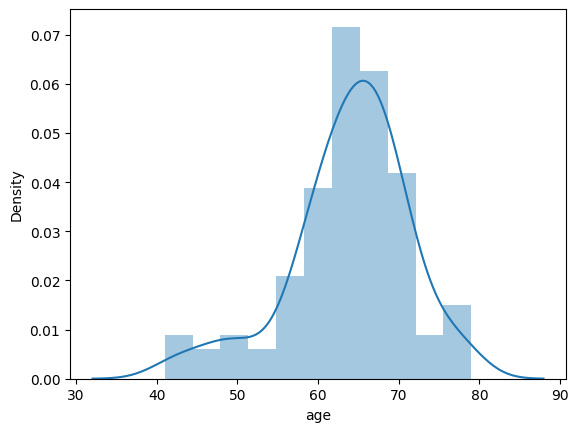

In [5]:
sns.distplot(df.age)

#### As we can see on our age distribution most expriments has been taken from older men from the age 60 - 70. The most common risk factor for prostate cancer is old age.

<Axes: xlabel='weight', ylabel='Density'>

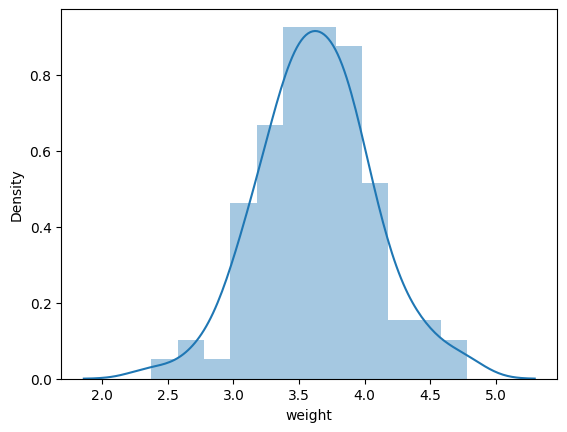

In [6]:
sns.distplot(df.weight)

<Axes: xlabel='count', ylabel='age'>

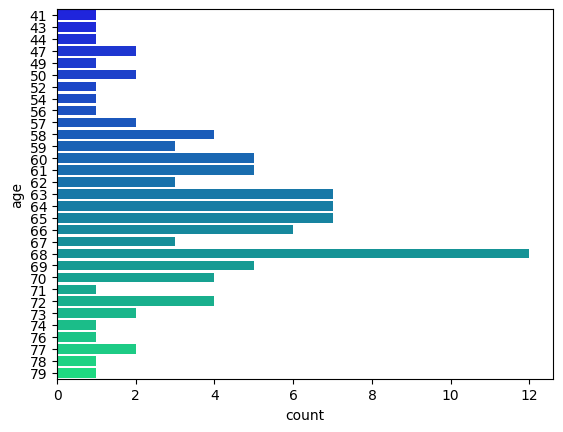

In [39]:
sns.countplot(data=df, y="age", palette="winter")

#### One or more tissue samples are taken from the prostate and examined under the microscope. The Gleason grading system refers to how abnormal your prostate cancer cells look and how likely the cancer is to advance and spread. A lower Gleason grade means that the cancer is slower growing and not aggressive.

In [7]:
df.gleason.value_counts()

7    56
6    35
9     5
8     1
Name: gleason, dtype: int64

<Axes: xlabel='gleason', ylabel='count'>

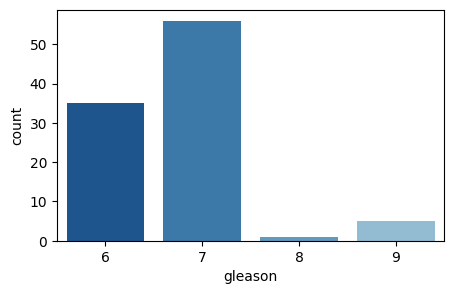

In [8]:
plt.figure(figsize=(5, 3))
sns.set_palette('Blues_r')
sns.countplot(df, x="gleason")

#### The scores are added together to come up with an overall score between 6 and 10. Overall, Gleason scores of 5 or lower are not used. The lowest Gleason score is 6, which is a low-grade cancer. A Gleason score of 7 is a medium-grade cancer, and a score of 8, 9, or 10 is a high-grade cancer.

As we can see from our observation, i.e graphic plot and descriptive statistics. 35 people has gleason score of 6 which is a low grade cancer. 56 people has the gleason score of 7 with a medium grade cancer. Few number of people 6 has the score of above 7 which is high-grade cancer.   

In [9]:
def range(age):
    if (age > 40) & (age < 50):
        return '40-50'
    elif (age > 50) & (age < 60):
        return '50-60'
    elif (age > 60) & (age < 70):
        return '60-70'
    else:
        return '70-80'


In [10]:
df['range'] = df.age.apply(range)
df['range'] = df['range'].astype("string")

In [11]:
df.range.value_counts()

60-70    55
70-80    24
50-60    12
40-50     6
Name: range, dtype: Int64

<Axes: xlabel='lpsa', ylabel='Density'>

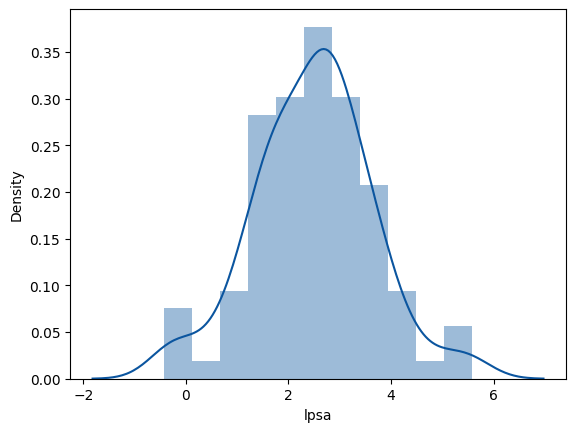

In [12]:
sns.distplot(df.lpsa)

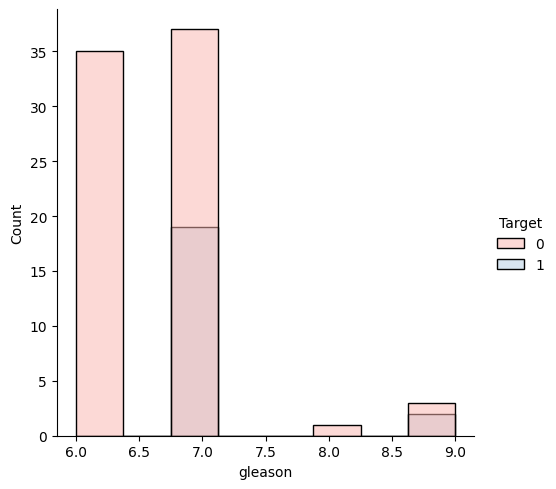

In [36]:
sns.set_palette("Pastel1")
sns.displot(df, x="gleason", hue="Target")

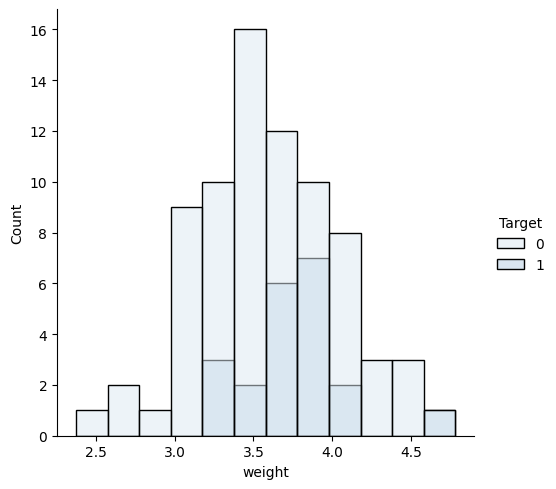

In [37]:
sns.set_palette("BuPu")
sns.displot(df, x="weight", hue="Target")

In [30]:
df.columns

Index(['lcavol', 'weight', 'age', 'lbph', 'lcp', 'gleason', 'pgg45', 'lpsa',
       'Target', 'range'],
      dtype='object')

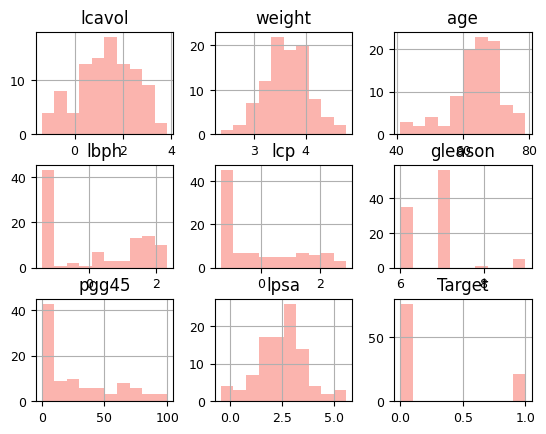

In [34]:
fig = df.hist(xlabelsize=9, ylabelsize=9)
plt.show()

##### As we can see from the graph above, The first row of graphs are normally distributed, while the second row is quite skewed.

<Axes: xlabel='weight', ylabel='lcp'>

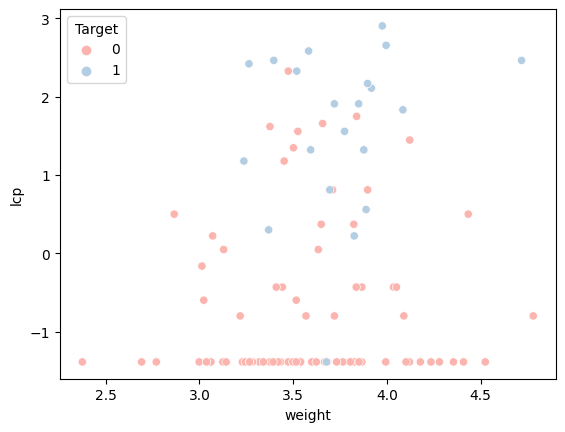

In [32]:
sns.set_palette('Pastel1')
sns.scatterplot(x = df.weight, y = df.lcp, hue=df.Target)

<Axes: xlabel='age', ylabel='gleason'>

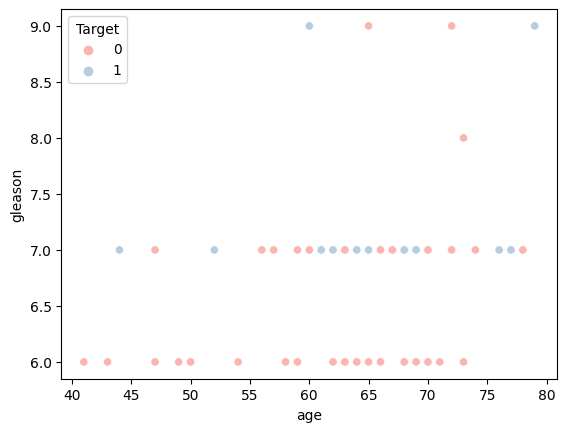

In [33]:
sns.set_palette('Pastel1')
sns.scatterplot(x = df.age, y = df.gleason, hue=df.Target)